<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Compression-with-SVD" data-toc-modified-id="Image-Compression-with-SVD-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Compression with SVD</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

# Image Compression with SVD

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img 

Image shape:  (512, 512, 3)


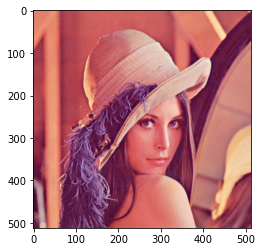

In [21]:
image = img.imread('data/lena.png')
plt.imshow(image)
print("Image shape: ", image.shape)

In [16]:
# Split color channels
image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]

# Apply SVD for each channel seperately
u1, s1, vh1 = np.linalg.svd(image_r, full_matrices=True)
u2, s2, vh2 = np.linalg.svd(image_g, full_matrices=True)
u3, s3, vh3 = np.linalg.svd(image_b, full_matrices=True)

print("u1.shape:", u1.shape)
print("s1.shape:", s1.shape)
print("vh1.shape:", vh1.shape)

u1.shape: (512, 512)
s1.shape: (512,)
vh1.shape: (512, 512)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


u1_tr.shape: (512, 40)
s1_tr.shape: (40,)
vh1_tr.shape: (40, 512)


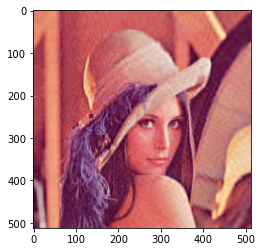

In [20]:
N = 40 # <== Set between 1 to 220. We will trim u,s,vh arrays according to this value

# Trim Red
u1_tr = u1[:,:N]
s1_tr = s1[:N]
vh1_tr = vh1[:N,:]

# Trim Green
u2_tr = u2[:,:N]
s2_tr = s2[:N]
vh2_tr = vh2[:N,:]

# Trim Blue
u3_tr = u3[:,:N]
s3_tr = s3[:N]
vh3_tr = vh3[:N,:]

print("u1_tr.shape:", u1_tr.shape)
print("s1_tr.shape:", s1_tr.shape)
print("vh1_tr.shape:", vh1_tr.shape)

# Reconstruct color channels according to trimmed eigen vectors
r_tr = np.dot(u1_tr * s1_tr, vh1_tr)
g_tr = np.dot(u2_tr * s2_tr, vh2_tr)
b_tr = np.dot(u3_tr * s3_tr, vh3_tr)

# Stack color channels
new_image = np.stack((r_tr, g_tr, b_tr), axis=2)

_=plt.imshow(new_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


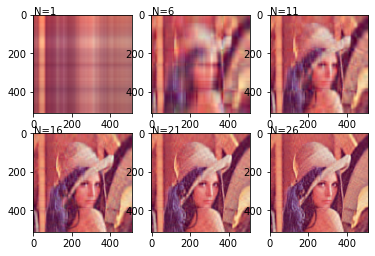

In [18]:
def svd_compression(image, N):
    image_r = image[:,:,0]
    image_g = image[:,:,1]
    image_b = image[:,:,2]

    u1, s1, vh1 = np.linalg.svd(image_r, full_matrices=True)
    u2, s2, vh2 = np.linalg.svd(image_g, full_matrices=True)
    u3, s3, vh3 = np.linalg.svd(image_b, full_matrices=True)
    
    u1_tr = u1[:,:N]
    s1_tr = s1[:N]
    vh1_tr = vh1[:N,:]
    u2_tr = u2[:,:N]
    s2_tr = s2[:N]
    vh2_tr = vh2[:N,:]
    u3_tr = u3[:,:N]
    s3_tr = s3[:N]
    vh3_tr = vh3[:N,:]
    
    r_tr = np.dot(u1_tr * s1_tr, vh1_tr)
    g_tr = np.dot(u2_tr * s2_tr, vh2_tr)
    b_tr = np.dot(u3_tr * s3_tr, vh3_tr)
    
    return np.stack((r_tr, g_tr, b_tr), axis=2)


fig=plt.figure()
for i in range(6):
    N = i*5+1
    new_image = svd_compression(image,N)
    fig.add_subplot(2,3,i+1)
    plt.text(2, 0.65, "N="+str(N))
    plt.imshow(new_image)

# Reference
- http://timbaumann.info/svd-image-compression-demo/